# IA Modèles et Raisonnements

## TP2 Transformers

### Liam Boudadi et Chloé Varin


In [ ]:
#téléchargement, un peu long parfois, de la librairie transformers
!pip install transformers
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


In [ ]:
#imports
import transformers
from transformers import pipeline
import pandas as pda
import matplotlib.pyplot as plt
import numpy as np

## 1. Classement avec le dataset French Book reviews


In [ ]:
filename = "french_books_reviews.csv"
#chargement d'un fichier CSV, donnée séparées par des virgules, encodage en UTF-8
df = pda.read_csv(filename)

#chargement d'un fichier CSV, donnée séparées par des tabulations, encodage en ISO-8859-1
#df = pda.read_csv(filename, sep='\t', encoding='ISO-8859-1')

In [ ]:
textes = df['reader_review']
textes[0]

'Ce n\'est pas le premier roman à aborder les thèmes lourds de l\'inceste et de l\'enfance martyre, mais il le fait avec une audace et un brio incomparables qui rendent ce livre marquant dans une vie de lecteur. On y sent à quel point l\'auteur n\'a pas cherché à "faire quelque chose", on ne sent jamais l\'intention, on sent juste l\'urgence, incandescente, à raconter la vérité d\'un homme maltraité par la vie au point de dire à la nuit «\xa0 tu ne me feras pas peur j\'ai plus de noir que toi dans mon enfance\xa0».'

On choisit d'utiliser un premier modèle qui donne pour un texte donnée un score dans 3 labels, negative, positive et neutral.


In [ ]:
# imports des modèles
model1 = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment-latest"
# ,top_k=None
                  )

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
model2 = pipeline("text-classification", model="lxyuan/distilbert-base-multilingual-cased-sentiments-student"
# ,return_all_scores = True
                  )

In [ ]:
model3 = pipeline("text-classification", model="avichr/heBERT_sentiment_analysis"
# ,top_k=None
                  )


In [ ]:
out = model1(textes[0])
print(out)

[{'label': 'neutral', 'score': 0.8171783089637756}]


In [ ]:
# Comparaison des modèles
scores1 = {'neutral':0,'positive':0,'negative':0}
scores2 = {'neutral':0,'positive':0,'negative':0}
scores3 = {'neutral':0,'positive':0,'negative':0}

for i in range(50):
  out1 = model1(textes[i])
  out2 = model2(textes[i])
  out3 = model3(textes[i])
  scores1[out1[0]['label']] +=1
  scores2[out2[0]['label']] +=1
  scores3[out3[0]['label']] +=1



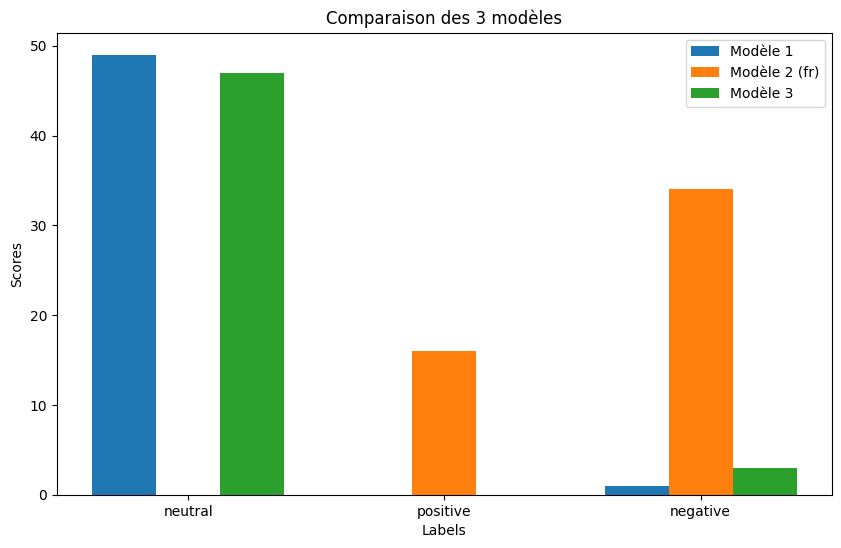

In [ ]:
labels = list(scores1.keys())
values_scores1 = list(scores1.values())
values_scores2 = list(scores2.values())
values_scores3 = list(scores3.values())

# Configuration de la largeur des barres et de leur position
bar_width = 0.25
index = np.arange(len(labels))

# Création de la figure et des axes
fig, ax = plt.subplots(figsize=(10, 6))

# Barres pour le premier dictionnaire
bar1 = ax.bar(index, values_scores1, bar_width, label='Modèle 1')

# Barres pour le deuxième dictionnaire
bar2 = ax.bar(index + bar_width, values_scores2, bar_width, label='Modèle 2 (fr)')

# Barres pour le troisième dictionnaire
bar3 = ax.bar(index + 2 * bar_width, values_scores3, bar_width, label='Modèle 3')

# Ajouter des labels et un titre
ax.set_xlabel('Labels')
ax.set_ylabel('Scores')
ax.set_title('Comparaison des 3 modèles')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels)

# Afficher la légende
ax.legend()

# Afficher le graphique
plt.show()

On a donc pour chaque modèle enregistré la prédiction donné, on remarque que les modèles 1 et 3 sont assez similaires dans leur prédictions, le modèle 2, qui est adapté à la langue des avis lui s'écarte des deux autres en trouvant plus d'avis négatifs et positifs au lieu de neutre. Cela met en évidence l'importance d'adapter le modèle à la donnée en entrée pour des performances cohérentes.


## 2.Résumé automatique


In [ ]:
from datasets import load_dataset

dataset = load_dataset('cnn_dailymail', '2.0.0')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [ ]:
dataset['train'][0]['article']

LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don't think I'll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office chart. Details of how

In [ ]:
from transformers import pipeline

# choix des modeles
model1 = pipeline("summarization", model="facebook/bart-large-cnn")
model2 = pipeline("summarization", model="csebuetnlp/mT5_multilingual_XLSum")
model3 = pipeline("summarization", model="MikaSie/LexLM_Longformer_BART_hybrid_V1")

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
test = model1(dataset['train'][0]['article'])
test[0]['summary_text']

"Harry Potter star Daniel Radcliffe turns 18 on Monday. He gains access to a reported £20 million ($41.1 million) fortune. Radcliffe's earnings from the first five Potter films have been held in a trust fund. Details of how he'll mark his landmark birthday are under wraps."

In [ ]:
test_model1 = []
test_model2 = []
test_model3 = []

for i in range(10):
    # Handle potential errors for each model
    try:
        out1 = model1(dataset['train'][i]['article'])
        test_model1.append(out1[0]['summary_text'])
    except Exception as e:
        print(f"Error with model1 on sample {i}: {e}")
        test_model1.append(None)  # Append None for failed summaries

    try:
        out2 = model2(dataset['train'][i]['article'])
        test_model2.append(out2[0]['summary_text'])
    except Exception as e:
        print(f"Error with model2 on sample {i}: {e}")
        test_model2.append(None)

    try:
        out3 = model3(dataset['train'][i]['article'])
        test_model3.append(out3[0]['summary_text'])
    except Exception as e:
        print(f"Error with model3 on sample {i}: {e}")
        test_model3.append(None)


On fait le traitement sur les 10 premières données seulement car le traitement des 40 prenait beaucoup de temps.

Analysons maintenant les résultats pou les différents modèles avec quelques exemples :


In [ ]:
print("Article highlights")
print(dataset['train'][0]['highlights'])

print('resume 1')
print(test_model1[0])
print('resume 2')
print(test_model2[0])
print('resume 3')
print(test_model3[0])

print('\nArticle highlights')
print(dataset['train'][1]['highlights'])

print('resume 1')
print(test_model1[1])
print('resume 2')
print(test_model2[1])
print('resume 3')
print(test_model3[1])

print('\nArticle highlights')
print(dataset['train'][2]['highlights'])
print('resume 1')
print(test_model1[2])
print('resume 2')
print(test_model2[2])
print('resume 3')
print(test_model3[2])

Article highlights
Harry Potter star Daniel Radcliffe gets £20M fortune as he turns 18 Monday .
Young actor says he has no plans to fritter his cash away .
Radcliffe's earnings from first five Potter films have been held in trust fund .
resume 1
Harry Potter star Daniel Radcliffe turns 18 on Monday. He gains access to a reported £20 million ($41.1 million) fortune. Radcliffe's earnings from the first five Potter films have been held in a trust fund. Details of how he'll mark his landmark birthday are under wraps.
resume 2
A young actor says he's not going to be extravagant when he turns 18.
resume 3
Harry Potter star Daniel Radcliffe gains access to a reported £20 million fortune as he turns 18 on Monday. The young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties.LONDON, England (Reuters) - Harry Potter star Dan Radcliffe has access to an estimated £20.1 million fortune, but he insists the money won't cast a spell on him. To the disappointme

Dans les 3 modèles on distingue des caractéristiques assez différentes, déja sur la longueur des résumés, si on les compare aux temps forts de l'article qui sont décris dans le dataset de base. Le premier modèle propose des résumés d'une longueur assez similaire, le deuxième des résumés très courts et le troisième modèle lui propose des résumés qui vont être assez longs.

En terme de qualité, on voit tout de suite que le modèle 1 propose un résumé très similaire aux highlights de l'article, les informations importantes du contexte sont présentes, sans redondance et de manière compréhensible. Ce n'est pas le cas pour les deux autres modèles, le deuxième modèle nous décris très peu le contenu de l'article, même si les informations sonr correctes, comme on le voit dans l'exemple 1, "A young actor says he's not going to be extravagant when he turns 18." c'est correct mais avec un grand manque de détail. Pour le modèle 3 on a le problème un petit peu inverse, peut être trop d'informations et elles ne sont pas amenées de manière cohérente, dans les articles 1 et 3 par exemple, le résumé est coupé avant la fin de la phrase, c'est peut être dû à un mauvais paramétrage du modèle, ensuite certaines informations sont répétées, comme la partie sur le montant d'argent gagné par l'acteur Daniel Radcliff dans l'exemple 1.

Si on devait faire un classement des 3 modèles testés on pourrait avoir m1 > m2 > m3 à mon avis car le modèle 2 peut être utilisé à des fins spécifiques si on veut un résumé très condensé.


## 3. Génération de texte


In [ ]:
# choix des modèles

# Use a pipeline as a high-level helper
from transformers import pipeline

# modele1 = pipeline("text-generation", model="openai-community/gpt2")
# modele2 = pipeline("text-generation", model="microsoft/phi-2")
modele3 = pipeline("text-generation", model="bigscience/bloom-560m")

In [ ]:
modele1(text_inputs="To make pancakes i need flour",max_length=30, num_return_sequences=5,  return_full_text=True)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'To make pancakes i need flour as well so you need to mix everything in. 1 piece flour = 2 eggs 1.5 x 1.4 tsp'},
 {'generated_text': 'To make pancakes i need flour, but for this recipe i also use my secret recipe recipe from this site.\n\nSo for the simple version,'},
 {'generated_text': 'To make pancakes i need flour, baking powder or baking soda so there is no air contact when cooking. There are not so many ways to use flour'},
 {'generated_text': "To make pancakes i need flour but so far I don't know if it's possible to make it for everyone.\n\nAlso, since i'm"},
 {'generated_text': 'To make pancakes i need flour and a little bit of sugar. i can put the ingredients in a cookie bag and chill then we can begin pouring the'}]

In [ ]:
print(modele2(text_inputs="To make pancakes i need flour",max_length=30,  return_full_text=True))
print(modele2(text_inputs="To make pancakes i need flour",max_length=30,  return_full_text=True))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'To make pancakes i need flour, eggs, milk, and butter.\n'}]
[{'generated_text': 'To make pancakes i need flour, eggs, milk, and butter.\n'}]


In [ ]:
modele3(text_inputs="To make pancakes i need flour",max_length=30,  return_full_text=True)

[{'generated_text': 'To make pancakes i need flour, salt, pepper, and a little water. I have a large bag of flour and a large bag of salt'}]

Ces trois modèles nous proposent des recettes plus ou moins cohérentes, les deux dernier modèles ne peremttent pas de générer plusieurs phrases différentes.
La première réponse du modèle 1 ressemble assez bien à une recette, même si la phrase n'est pas entièrement cohérente. Certaines des autres réponses sont coupées avant la fin ou ne font pas trop de sens.

Le deuxième modèle propose une recette assez simple sans instructions mais plutôt correcte dans les ingrédients et la phase est correcte.

Le troisième modèle lui propose une réponse qui corresond au début de la phrase, pas tout à fait complète dans la recette et la deuxième partie de la phrase sort quelque peu de nul part.


## 4 - Réponse à tout


#### Roberta


In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("question-answering", model="deepset/roberta-base-squad2")

# Text
context = """
The Renaissance was a fervent period of European cultural, artistic, political, and economic “rebirth” following the Middle Ages. Generally described as taking place from the 14th century to the 17th century, the Renaissance promoted the rediscovery of classical philosophy, literature, and art. Some of the greatest thinkers, authors, statesmen, scientists, and artists in human history thrived during this era, while global exploration opened up new lands and cultures to European commerce.
"""

questions = [
    "From when to when did the Renaissance generally take place?",
    "What did the Renaissance promote the rediscovery of?",
    "Who thrived during the Renaissance era?"
]

outputs_roberta = []

print(f"Text:\n{context}\n")
for j, question in enumerate(questions, 1):
  output = pipe({"context": context, "question": question })
  outputs_roberta.append(output)
  print(f"Question {j} : {question} - {output}")


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Text:

The Renaissance was a fervent period of European cultural, artistic, political, and economic “rebirth” following the Middle Ages. Generally described as taking place from the 14th century to the 17th century, the Renaissance promoted the rediscovery of classical philosophy, literature, and art. Some of the greatest thinkers, authors, statesmen, scientists, and artists in human history thrived during this era, while global exploration opened up new lands and cultures to European commerce.


Question 1 : From when to when did the Renaissance generally take place? - {'score': 0.4328518807888031, 'start': 176, 'end': 208, 'answer': '14th century to the 17th century'}
Question 2 : What did the Renaissance promote the rediscovery of? - {'score': 0.9106848835945129, 'start': 254, 'end': 295, 'answer': 'classical philosophy, literature, and art'}
Question 3 : Who thrived during the Renaissance era? - {'score': 0.2341907024383545, 'start': 297, 'end': 371, 'answer': 'Some of the greatest

#### Distilbert


In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("question-answering", model="distilbert/distilbert-base-cased-distilled-squad")

# Text
context = """
The Renaissance was a fervent period of European cultural, artistic, political, and economic “rebirth” following the Middle Ages. Generally described as taking place from the 14th century to the 17th century, the Renaissance promoted the rediscovery of classical philosophy, literature, and art. Some of the greatest thinkers, authors, statesmen, scientists, and artists in human history thrived during this era, while global exploration opened up new lands and cultures to European commerce.
"""

questions = [
    "From when to when did the Renaissance generally take place?",
    "What did the Renaissance promote the rediscovery of?",
    "Who thrived during the Renaissance era?"
]

outputs_distilbert = []

print(f"Text:\n{context}\n")
for j, question in enumerate(questions, 1):
  output = pipe({"context": context, "question": question })
  outputs_distilbert.append(output)
  print(f"Question{j} : {question} - {output}")

config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Text:

The Renaissance was a fervent period of European cultural, artistic, political, and economic “rebirth” following the Middle Ages. Generally described as taking place from the 14th century to the 17th century, the Renaissance promoted the rediscovery of classical philosophy, literature, and art. Some of the greatest thinkers, authors, statesmen, scientists, and artists in human history thrived during this era, while global exploration opened up new lands and cultures to European commerce.


Question1 : From when to when did the Renaissance generally take place? - {'score': 0.45690998435020447, 'start': 176, 'end': 208, 'answer': '14th century to the 17th century'}
Question2 : What did the Renaissance promote the rediscovery of? - {'score': 0.8421534299850464, 'start': 254, 'end': 295, 'answer': 'classical philosophy, literature, and art'}
Question3 : Who thrived during the Renaissance era? - {'score': 0.05687082186341286, 'start': 375, 'end': 388, 'answer': 'human history'}


#### Koelectra


In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("question-answering", model="monologg/koelectra-small-v2-distilled-korquad-384")

# Text
context = """
The Renaissance was a fervent period of European cultural, artistic, political, and economic “rebirth” following the Middle Ages. Generally described as taking place from the 14th century to the 17th century, the Renaissance promoted the rediscovery of classical philosophy, literature, and art. Some of the greatest thinkers, authors, statesmen, scientists, and artists in human history thrived during this era, while global exploration opened up new lands and cultures to European commerce.
"""

questions = [
    "From when to when did the Renaissance generally take place?",
    "What did the Renaissance promote the rediscovery of?",
    "Who thrived during the Renaissance era?"
]

outputs_koelectra = []

print(f"Text:\n{context}\n")
for j, question in enumerate(questions, 1):
  output = pipe({"context": context, "question": question })
  outputs_koelectra.append(output)
  print(f"Question{j} : {question} - {output}")

config.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/54.8M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/255k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Text:

The Renaissance was a fervent period of European cultural, artistic, political, and economic “rebirth” following the Middle Ages. Generally described as taking place from the 14th century to the 17th century, the Renaissance promoted the rediscovery of classical philosophy, literature, and art. Some of the greatest thinkers, authors, statesmen, scientists, and artists in human history thrived during this era, while global exploration opened up new lands and cultures to European commerce.


Question1 : From when to when did the Renaissance generally take place? - {'score': 0.25312483310699463, 'start': 141, 'end': 166, 'answer': 'described as taking place'}
Question2 : What did the Renaissance promote the rediscovery of? - {'score': 0.9638418555259705, 'start': 254, 'end': 274, 'answer': 'classical philosophy'}
Question3 : Who thrived during the Renaissance era? - {'score': 0.8369368314743042, 'start': 475, 'end': 492, 'answer': 'European commerce'}


#### Comparaison


In [ ]:
for output in outputs_roberta, outputs_koelectra, outputs_distilbert:
  print(output)

[{'score': 0.4328518807888031, 'start': 176, 'end': 208, 'answer': '14th century to the 17th century'}, {'score': 0.9106848835945129, 'start': 254, 'end': 295, 'answer': 'classical philosophy, literature, and art'}, {'score': 0.2341907024383545, 'start': 297, 'end': 371, 'answer': 'Some of the greatest thinkers, authors, statesmen, scientists, and artists'}]
[{'score': 0.25312483310699463, 'start': 141, 'end': 166, 'answer': 'described as taking place'}, {'score': 0.9638418555259705, 'start': 254, 'end': 274, 'answer': 'classical philosophy'}, {'score': 0.8369368314743042, 'start': 475, 'end': 492, 'answer': 'European commerce'}]
[{'score': 0.45690998435020447, 'start': 176, 'end': 208, 'answer': '14th century to the 17th century'}, {'score': 0.8421534299850464, 'start': 254, 'end': 295, 'answer': 'classical philosophy, literature, and art'}, {'score': 0.05687082186341286, 'start': 375, 'end': 388, 'answer': 'human history'}]


<Figure size 1000x600 with 0 Axes>

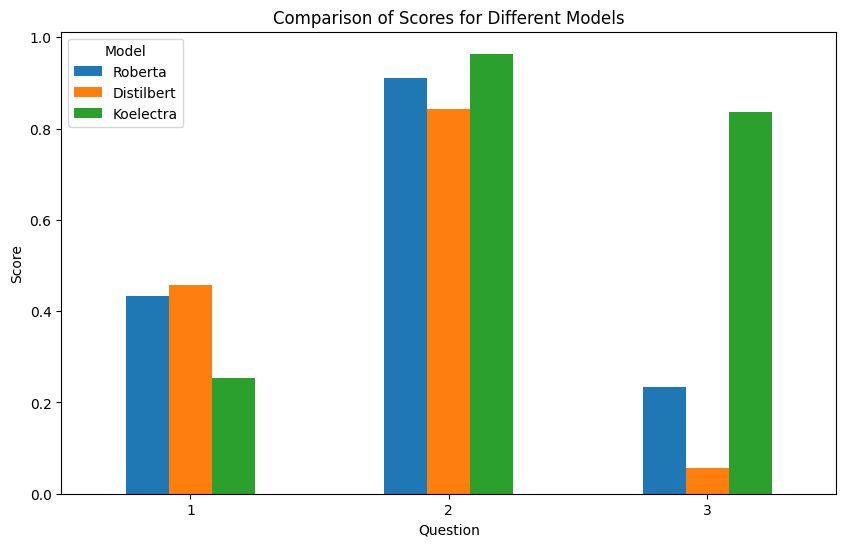

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract scores
scores_roberta = [item['score'] for item in outputs_roberta]
scores_distilbert = [item['score'] for item in outputs_distilbert]
scores_koelectra = [item['score'] for item in outputs_koelectra]

# Extract answers
answers_roberta = [item['answer'] for item in outputs_roberta]
answers_distilbert = [item['answer'] for item in outputs_distilbert]
answers_koelectra = [item['answer'] for item in outputs_koelectra]

# Create a DataFrame for scores comparison
df_scores = pd.DataFrame({
    'Question': [1, 2, 3],
    'Roberta': scores_roberta,
    'Distilbert': scores_distilbert,
    'Koelectra': scores_koelectra
})

# Plotting the scores comparison
plt.figure(figsize=(10, 6))
df_scores.plot(x='Question', kind='bar', figsize=(10, 6))
plt.title('Comparison of Scores for Different Models')
plt.ylabel('Score')
plt.xlabel('Question')
plt.xticks(rotation=0)
plt.legend(title='Model')
plt.show()

Les models de questions-answering sont généralement d'accord sur les réponses avec quelques différences. Le model Roberta est le plus précis, il donne des bonnes réponses suivit de près par Distilbert. Koelectra est le moins précis des trois, il donne des réponses qui ne sont pas toujours correctes. Cependant, Koelectra reste quand même assez sûr de ses réponses (score).
Pour mieux comparer les modèles, il faudrait tester sur un plus grand nombre de questions et de réponses.


## 5 - Réponse à tout 2


In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

models = [pipeline("text2text-generation", model="google/byt5-small", max_length=500),
          pipeline("text2text-generation", model="google/flan-t5-base", max_length=500),
          pipeline("text2text-generation", model="MaRiOrOsSi/t5-base-finetuned-question-answering", max_length=500)]

# Text
context = """
The Renaissance was a fervent period of European cultural, artistic, political, and economic “rebirth” following the Middle Ages. Generally described as taking place from the 14th century to the 17th century, the Renaissance promoted the rediscovery of classical philosophy, literature, and art. Some of the greatest thinkers, authors, statesmen, scientists, and artists in human history thrived during this era, while global exploration opened up new lands and cultures to European commerce.
"""

questions = [
    "From when to when did the Renaissance generally take place?",
    "What did the Renaissance promote the rediscovery of?",
    "Who thrived during the Renaissance era?"
]

# Function to generate answers using the text-to-text pipeline
def generate_answer(pipeline, context, question):
    input_text = f"question: {question} context: {context}"
    result = pipeline(input_text)
    return result[0]['generated_text']

# Generate and print the answers for each question
print(f"Text:\n{context}\n")
for model in models:
  print(f"========= Model {models.index(model)+1} ==========")
  for j, question in enumerate(questions, 1):
      answer = generate_answer(model, context, question)
      print(f"Question {j}: {question} - Answer: {answer}")

config.json:   0%|          | 0.00/698 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.59k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.50k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.99k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Text:

The Renaissance was a fervent period of European cultural, artistic, political, and economic “rebirth” following the Middle Ages. Generally described as taking place from the 14th century to the 17th century, the Renaissance promoted the rediscovery of classical philosophy, literature, and art. Some of the greatest thinkers, authors, statesmen, scientists, and artists in human history thrived during this era, while global exploration opened up new lands and cultures to European commerce.


========= Model 1 ==========
Question 1: From when to when did the Renaissance generally take place? - Answer:  the Renaissance was a fervent period of European cultural, artistic, political, and economic “rebirth”? context: context: context: context: context: context: context: context: 
Question 2: What did the Renaissance promote the rediscovery of? - Answer:  the Renaissance was a fervent period of European cultural, literature, and art. Some of the Greatest thinkers, authors, statesmen, sc

En utilisant des modèles de génration de texte vers texte, on peut voir qu'on obtient de très bonne réponses, encore plus détaillé qu'avec les modèles de questions-réponses (model Mariorossi suivit de près par google flan-t5). Les réponses sont plus longues et plus détaillées. Cependant, avec le model google byt5-small les réponses non pas de sens. De même qu'avec les modèles de questions-réponses, il faudrait tester sur un plus grand nombre de questions et de réponses pour mieux comparer les modèles.


## 6 - Traduction


In [ ]:
# GOOGLE BYT5-SMALL
from transformers import pipeline

pipe = pipeline("text2text-generation", model="google/byt5-small", max_length=100)
text_input = ("Question: translate to french., Context: How are you?")
translation = pipe(text_input)
print(translation[0]['generated_text'])


 french., Context: How are you?, Context: How are you?, Context: How are you?, Context: How are yo


In [ ]:
# GOOGLE FLAN-T5-BASE
from transformers import pipeline

pipe = pipeline("text2text-generation", model="google/flan-t5-base", max_length=100)
text_input = ("Question: translate to french., Context: How are you?")
translation = pipe(text_input)
print(translation[0]['generated_text'])

 Comment tu ?


In [ ]:
# FACEBOOK m2m100
from transformers import pipeline

pipe = pipeline("text2text-generation", model="facebook/m2m100_1.2B")
text_input = ("Question: translate to french., Context: How are you?")
translation = pipe(text_input)
print(translation[0]['generated_text'])

Question : traduire en français., Contexte : Comment vous sentez-vous ?


En utilisant des models "text2text-generation", la traduction n'est pas faite correctement. Google small ne comprend même pas ce qu'il lui est demandé lorsque google flan-t5-base, lui, comprend mais ne traduit pas correctement, même sur un texte aussi simple que "How are you?". Cependant, en utilisant un model de génération text vers text spécialisé dans la traduction de textes, nous obtenons une bonne traduction (avec juste une incompréhension de quel est exatement le texte à traduire probablement dû à une mauvaise utilisation du model).

Nous en concluons donc que les models de type text2text-generation ne sont généralement pas très adapté à la traduction de texte même s'il existe certains models étant capable de fournir une bonne traduction.


In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

models = [pipeline("translation_en_to_fr", model="google-t5/t5-small", max_length=500),
          pipeline("translation", model="Helsinki-NLP/opus-mt-en-fr", max_length=500),
          pipeline("translation_en_to_fr", model="facebook/nllb-200-distilled-600M", max_length=500),
         ]

text_input = ("The Renaissance was a fervent period of European cultural, artistic, political, and economic “rebirth” following the Middle Ages.")

for model in models:
  translation = model(text_input)
  print(f"Model {models.index(model)} : {translation[0]['translation_text']}")

Model 0 : La Renaissance a été une période fervente de « renaissance » culturelle, artistique, politique et économique européenne après le Moyen ge.
Model 1 : La Renaissance fut une période fervente de renaissance culturelle, artistique, politique et économique européenne après le Moyen Age.
Model 2 : fr:Renaissance was a period of European cultural, artistic, political, and economic renaissance following the Middle Ages.


In [ ]:
from transformers import pipeline


models = [pipeline("translation_en_to_de", model="google-t5/t5-small", max_length=500),
          pipeline("translation", model="Helsinki-NLP/opus-mt-en-de", max_length=500),
          pipeline("translation_en_to_de", model="facebook/nllb-200-distilled-600M", max_length=500)]

text_input = ("The Renaissance was a fervent period of European cultural, artistic, political, and economic “rebirth” following the Middle Ages.")

for model in models:
  translation = model(text_input)
  print(f"Model {models.index(model)} : {translation[0]['translation_text']}")

Model 0 : Die Renaissance war eine erbitterte Periode der europäischen kulturellen, künstlerischen, politischen und wirtschaftlichen Wiedergeburt nach dem Mittelalter.
Model 1 : Die Renaissance war eine inbrünstige Periode der europäischen kulturellen, künstlerischen, politischen und wirtschaftlichen Wiedergeburt nach dem Mittelalter.
Model 2 : de: "La Renaissance fut un ardent période de renaissance culturelle, artistique, politique et économique européenne, qui suivit le Moyen Âge.


Cependant, en utilisant des models spécialisé dans la traduction, nous obtenons des résultats corrects pour 2 des 3 models testés. Le model de facebook semble avoir bien compris qu'il fallait traduire en français (ou en allemand) mais ne traduit pas dutout (ou traduit en français pour aucune raison).
